In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D,GlobalAveragePooling2D, MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow
from numpy.core.fromnumeric import size
import cv2
import itertools
import os
import shutil
import random
import glob as gb
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
testpath='/content/drive/MyDrive/Yemeni_coins2/test1'
trainpath='/content/drive/MyDrive/Yemeni_coins2/train1'
validpath='/content/drive/MyDrive/Yemeni_coins2/valid1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(
    directory=trainpath, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(
    directory=validpath, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input).flow_from_directory(
    directory=testpath, target_size=(224,224), batch_size=10, shuffle=False)

Found 6036 images belonging to 6 classes.
Found 2009 images belonging to 6 classes.
Found 2016 images belonging to 6 classes.


In [ ]:
dense = tf.keras.applications.densenet.DenseNet121(include_top=False)
x=dense.output
x=GlobalAveragePooling2D()(x)
output = Dense(units=6, activation='softmax')(x)
model = Model(inputs=dense.input, outputs=output)

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
len(model.layers)

429

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=20,
          verbose=1
)

Epoch 1/20
604/604 [==============================] - 1626s 3s/step - loss: 0.2156 - accuracy: 0.9299 - val_loss: 0.0453 - val_accuracy: 0.9826
Epoch 2/20
604/604 [==============================] - 219s 362ms/step - loss: 0.0236 - accuracy: 0.9947 - val_loss: 0.0224 - val_accuracy: 0.9930
Epoch 3/20
604/604 [==============================] - 218s 361ms/step - loss: 0.0268 - accuracy: 0.9934 - val_loss: 0.0306 - val_accuracy: 0.9895
Epoch 4/20
604/604 [==============================] - 219s 363ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.3321 - val_accuracy: 0.9149
Epoch 5/20
604/604 [==============================] - 220s 365ms/step - loss: 0.0140 - accuracy: 0.9967 - val_loss: 0.0180 - val_accuracy: 0.9945
Epoch 6/20
604/604 [==============================] - 218s 361ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0862 - val_accuracy: 0.9741
Epoch 7/20
604/604 [==============================] - 220s 364ms/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 0.0814 - v

In [ ]:
np.save('/content/drive/MyDrive/Model/history_dense5.npy',history.history)
model.save('/content/drive/MyDrive/Model/Model_dense5.h5')
print('save')


In [ ]:
#history=np.load('my_history.npy',allow_pickle='TRUE').item()

save


In [ ]:
x,y=model.evaluate(test_batches)
print('loss is ',x*100)
print('Accuracy is ',y*100)

368/368 [==============================] - 2143s 6s/step - loss: 0.3040 - accuracy: 0.9578
loss is  30.401620268821716
Accuracy is  95.7777202129364


Visualizing the Loss and Accuracy

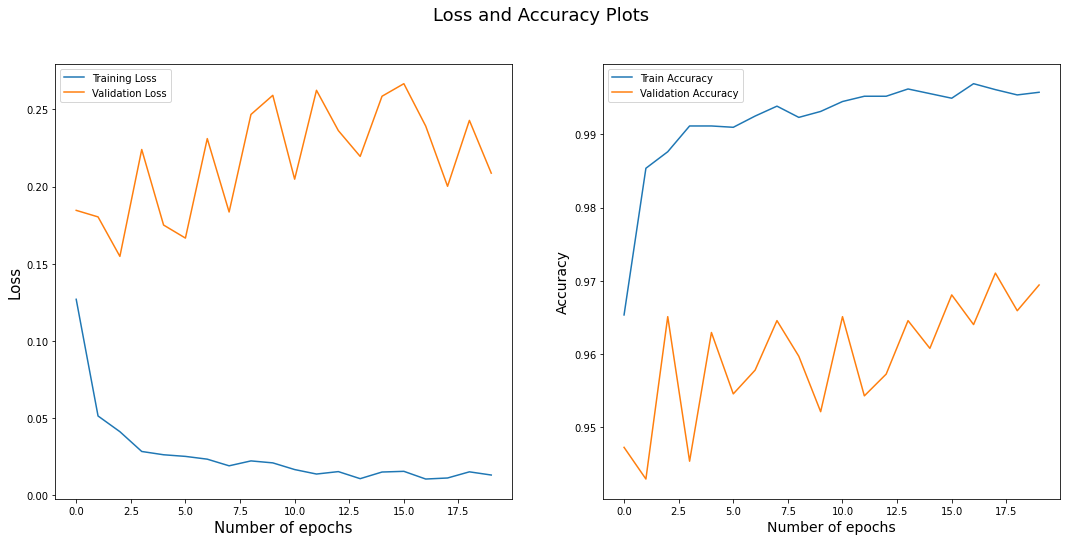

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))
plt.suptitle('Loss and Accuracy Plots', fontsize=18)
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
test_batches.class_indices

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[307   0   0   0   1   0   0   0   0   0   0   0]
 [  0 278   0   0   5   1   0   1   1   0   0   0]
 [  0   0 271   0   2   0   2   0  30   0   3   0]
 [  0   1   0 306   0   0   1   0   0   0   0   0]
 [  0   0   0   0 308   0   0   0   0   0   0   0]
 [  0   0   0   0   8 292   0   0   0   0   1   6]
 [ 14   0   0   0   1   2 288   0   1   0   2   0]
 [  0  11   0   0   2   0   0 292   0   1   0   0]
 [  0   0  22   0   0   0   0   0 283   0   3   0]
 [  2   0   0   0   2   1   0   0   0 303   0   0]
 [  0   0   0   0  17   0   0   0   0   0 291   0]
 [  0   0   0   0   0  11   0   0   0   0   0 297]]


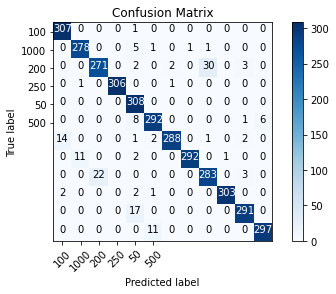

In [ ]:
cm_plot_labels = ['100','1000','200','250','50','500']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
os.chdir('/content/drive/MyDrive/Yemeni_coins/new_test')
files=gb.glob('*')
len(files)

147

In [ ]:
in_data=[]
os.chdir('/content/drive/MyDrive/Yemeni_coins/new_test')
files=gb.glob('*')
for c in files:
  pre_imge=prepare_image(c)
  in_data.append(pre_imge)
in_data=np.array(in_data)

pre_data=[]
for c in in_data:
  predictions =model_mobile.predict(c)
  pre_data.append(np.argmax(predictions))
pre_data=np.array(pre_data)

i=0
count=0
for c in files:
  if cm_plot_labels[pre_data[i]]!=c.split('_')[0]:
    print(f'{c}---{cm_plot_labels[pre_data[i]]}------- {i}')
    count+=1
  i+=1
print(f'the error is {count} from {len(files)} images')


250_‫(3)‬.jpg---500------- 30
250_3.jpg---500------- 32
50_‫(5)‬.jpg---100------- 36
1000_6.jpg---500------- 41
1000_0‬.jpg---250------- 42
50_‬.jpg---200------- 44
1000_02 (5).jpg---500------- 69
1000_50 (4).jpg---250------- 125
the error is 8 from 147 images
